# **Anomaly Detection in Network Traffic Using Clustering**




Richard David (M24CSE019)




### Importing libraries and data:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Define the path to dataset within Google Drive
train_file_path = '/content/drive/My Drive/ML Project dataset/Train.txt'
test_file_path = '/content/drive/My Drive/ML Project dataset/Test.txt'

# Load training and testing data from the specified path in Google Drive
# training and testing data are not used in this project as they are named but as two components of data that have differnet size.
train_data = pd.read_csv(train_file_path, header=None, sep=',')
test_data = pd.read_csv(test_file_path, header=None, sep=',')

# Define column names
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
           "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
           "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
           "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
           "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
           "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack", "last_flag"]
train_data.columns = columns
test_data.columns = columns




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#TRAINING DATA - Larger segment of data
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
#TEST DATA-  smaller segment of data
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


### Pre-Processing:

In [ ]:
# Check for missing values
print(train_data.isnull().sum())
train_data.drop_duplicates(inplace=True)

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
train_data.shape

(125973, 43)

In [ ]:
test_data.shape

(22544, 43)

In [ ]:
# Check for duplicate values
train_duplicates = train_data.duplicated().sum()
test_duplicates = test_data.duplicated().sum()

print(f"Number of duplicate rows in the training data: {train_duplicates}")
print(f"Number of duplicate rows in the testing data: {test_duplicates}")

# Code to remove duplicate vlaues if found
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

print("Training data shape after removing duplicates:", train_data.shape)
print("Testing data shape after removing duplicates:", test_data.shape)


Number of duplicate rows in the training data: 0
Number of duplicate rows in the testing data: 0
Training data shape after removing duplicates: (125973, 43)
Testing data shape after removing duplicates: (22544, 43)


In [ ]:
# Drop specified columns from data , as these columns contained '0' entirely
columns_to_drop = ['land', 'urgent', 'num_failed_logins', 'num_outbound_cmds']
train_data.drop(columns=columns_to_drop, axis=1, inplace=True)
test_data.drop(columns=columns_to_drop, axis=1, inplace=True)



This section of the code applies the LabelEncoder from scikit-learn to encode the categorical variables in the dataset. It focuses on the columns protocol_type, service, and flag.

The below section converts the attack column in both the training and test datasets into a binary classification column called attack_binary.

In [ ]:
# Encode categorical features with LabelEncoder
categorical_columns = ['protocol_type', 'service', 'flag']
label_encoders = {col: LabelEncoder().fit(train_data[col]) for col in categorical_columns}
for col, le in label_encoders.items():
    train_data[col] = le.transform(train_data[col])
    test_data[col] = test_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Binary classification for 'attack' column
train_data['attack_binary'] = train_data['attack'].apply(lambda x: 'normal' if x == 'normal' else 'attack')
test_data['attack_binary'] = test_data['attack'].apply(lambda x: 'normal' if x == 'normal' else 'attack')


### EDA

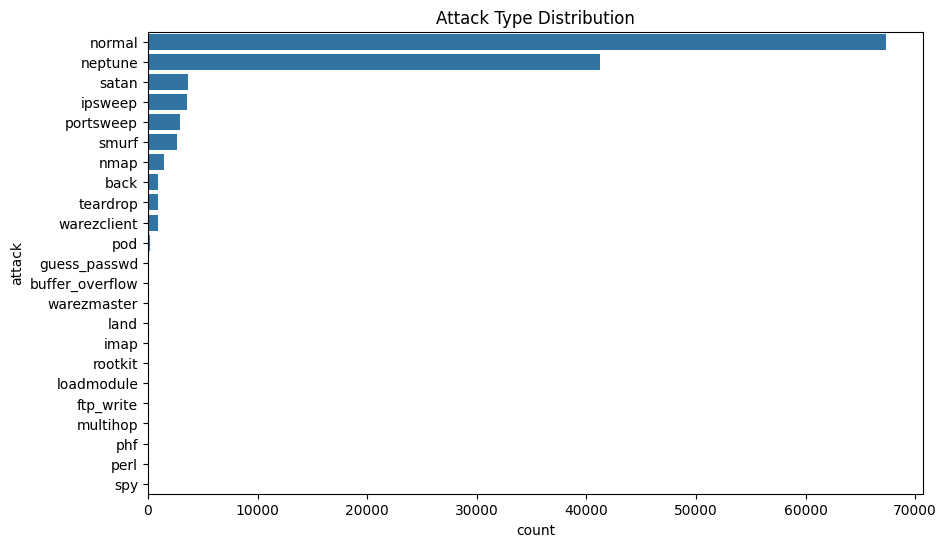

In [ ]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(y='attack', data=train_data, order=train_data['attack'].value_counts().index)
plt.title("Attack Type Distribution")
plt.show()

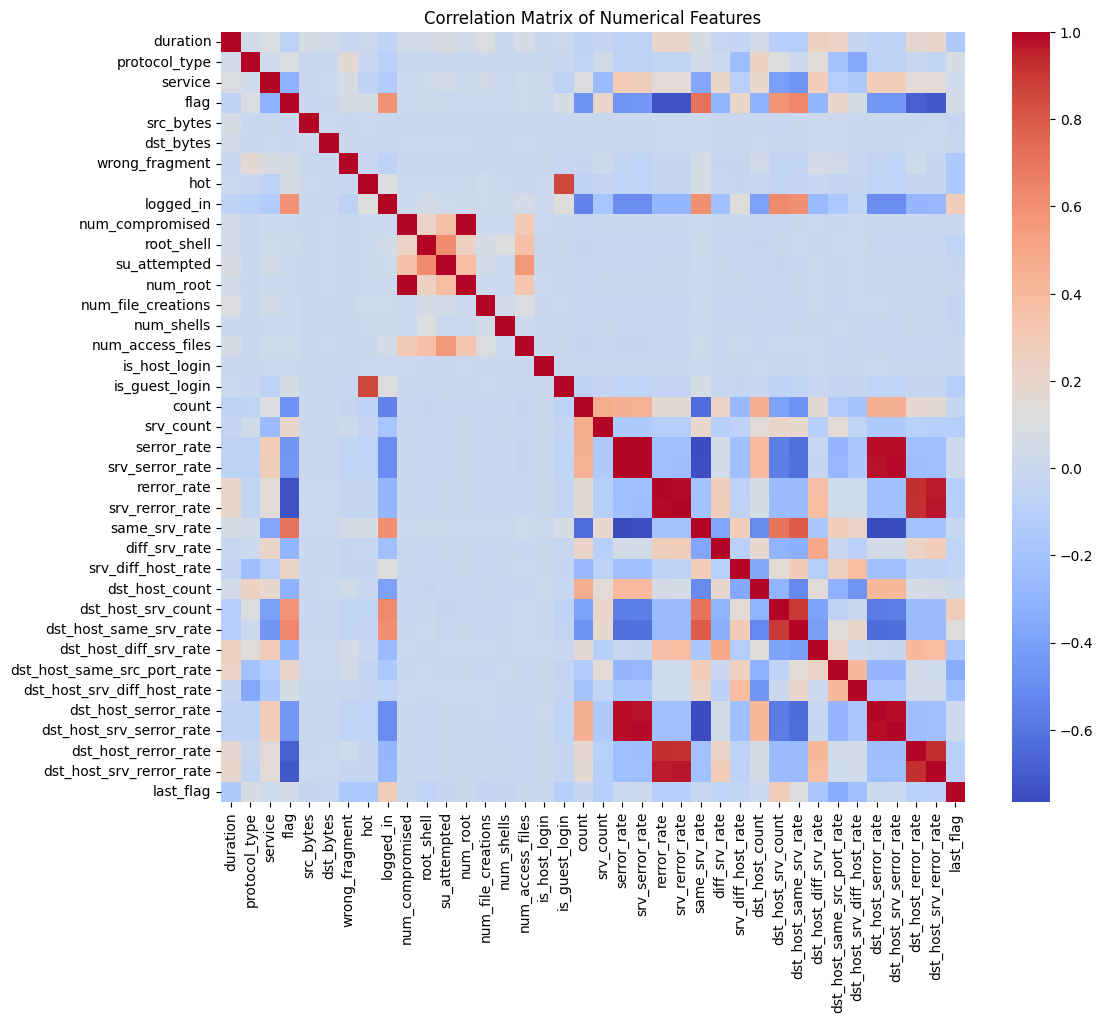

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = train_data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

A pairplot to visualize the relationships between selected features in the training data. It first filters the train_data to include the columns 'duration', 'count', 'srv_count', and 'attack_binary', which are relevant for exploring patterns that could help distinguish between normal and attack traffic.

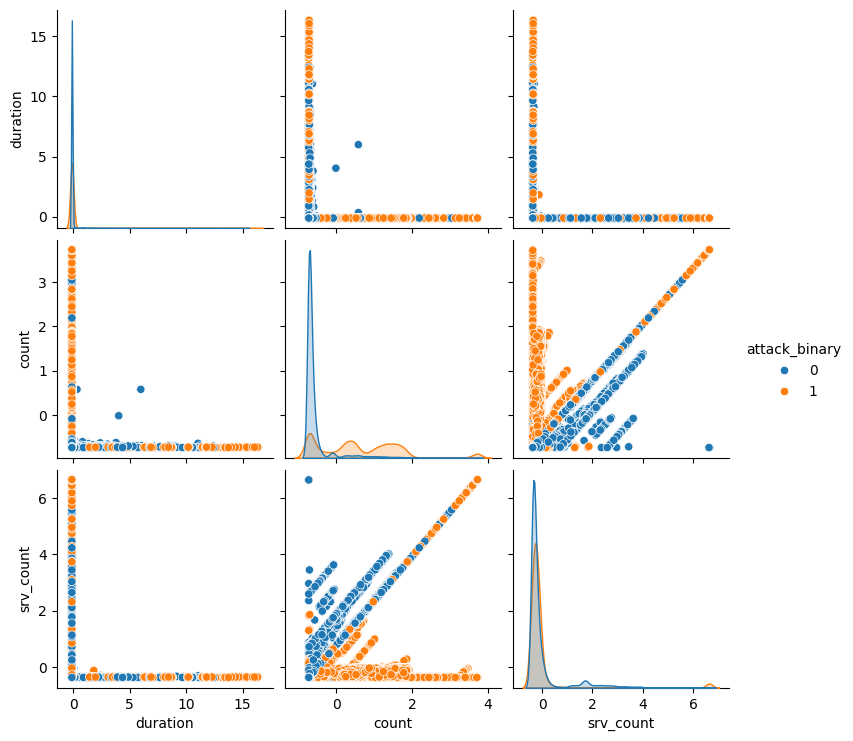

In [ ]:
# Pairplot for selected features
sns.pairplot(train_data[['duration', 'count', 'srv_count', 'attack_binary']], hue='attack_binary')
plt.show()

This code identifies pairs of features with high correlation in the dataset by calculating the correlation matrix and filtering pairs with a correlation above 0.8. It excludes self-correlations and prints the highly correlated feature pairs.







In [ ]:
# Finding features with high correlation
threshold = 0.8  # threshold for high correlation
high_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()

# Filter out pairs with a high correlation
high_corr_pairs = high_corr_pairs[(high_corr_pairs > threshold) & (high_corr_pairs < 1)]

print("\nHighly correlated feature pairs (above threshold of 0.8):")
print(high_corr_pairs)



Highly correlated feature pairs (above threshold of 0.8):
num_compromised           num_root                    0.998833
serror_rate               srv_serror_rate             0.993289
rerror_rate               srv_rerror_rate             0.989008
srv_serror_rate           dst_host_srv_serror_rate    0.986252
dst_host_serror_rate      dst_host_srv_serror_rate    0.985052
dst_host_srv_serror_rate  serror_rate                 0.981139
dst_host_serror_rate      serror_rate                 0.979373
srv_serror_rate           dst_host_serror_rate        0.977596
srv_rerror_rate           dst_host_srv_rerror_rate    0.970208
rerror_rate               dst_host_srv_rerror_rate    0.964449
dst_host_rerror_rate      rerror_rate                 0.926749
dst_host_srv_rerror_rate  dst_host_rerror_rate        0.924688
dst_host_rerror_rate      srv_rerror_rate             0.917822
dst_host_same_srv_rate    dst_host_srv_count          0.896663
is_guest_login            hot                         0.860

This code removes specific features from the training and test datasets to prevent redundancy, based on high correlation.  The operation is performed using the drop function, ensuring that these features do not impact model performance or introduce multicollinearity

In [ ]:
# Remove  features with high correlation to avoid redundancy
train_data.drop(['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate'], axis=1, inplace=True)
test_data.drop(['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate'], axis=1, inplace=True)

print("Features removed to prevent redundancy.")


Features removed to prevent redundancy.


This code standardizes the numeric features in both the training and test datasets using StandardScaler. It first identifies the numeric columns *(int64 and float64)* in the training data, and applies the scaler to these columns, transforming them to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Standardize numeric features
scaler = StandardScaler()
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])


## **K-Means Clustering**

 Elbow Method to determine the optimal number of clusters for K-Means clustering. It iterates through different values of
𝑘. Afterward, we have plot the SSE values against the number of clusters, where the "elbow" point indicates the optimal number of clusters.

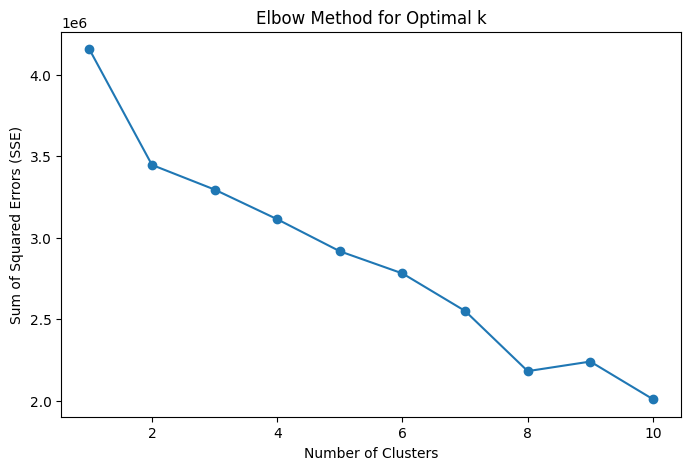

In [ ]:
#  Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(train_data[numeric_columns])
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()



 K-Means clustering with 2 clusters( based on the elbow plot above) to the training data. The data is clustered into two groups (representing normal and attack categories).

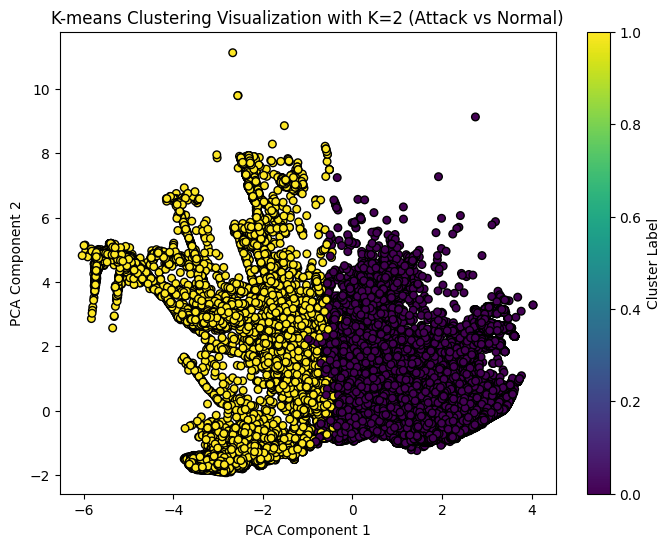

In [ ]:
X = train_data.drop(columns=['attack', 'attack_binary'])

# K-Means clustering with 2 clusters based on the elbow plot
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=30)
plt.title('K-means Clustering Visualization with K=2 (Attack vs Normal)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()



The confusion matrix is computed by comparing the true labels (attack_binary) with the predicted labels (predicted_attack).

Then it is visualized using a heatmap from the seaborn library, with annotations showing the count of predictions for each class. The accuracy is displayed in the title of the plot.



Confusion Matrix:
[[48107 10523]
 [ 2320 65023]]
Accuracy: 0.8980495820532971


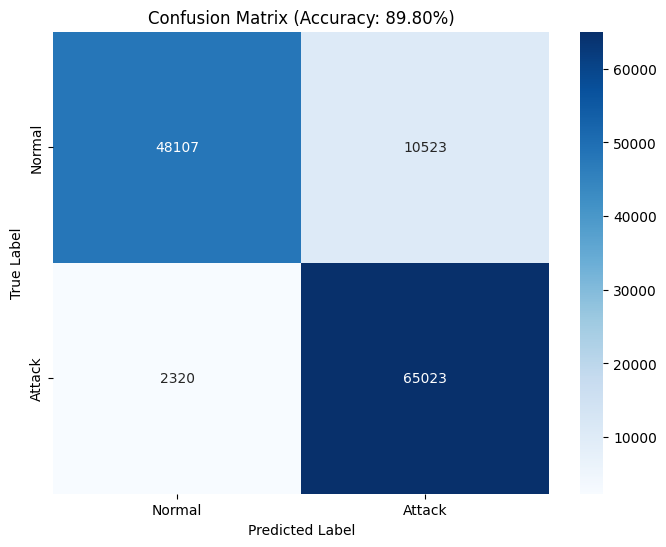

In [ ]:
# Adding cluster labels
train_data['cluster'] = kmeans_labels

# Assigning the majority attack_binary label to each cluster
cluster_labels = {}
for cluster in range(2):
    majority_label = train_data[train_data['cluster'] == cluster]['attack_binary'].mode()[0]
    cluster_labels[cluster] = majority_label

# Maping the majority label to predicted_attack
train_data['predicted_attack'] = train_data['cluster'].map(cluster_labels)

#  confusion matrix
cm = confusion_matrix(train_data['attack_binary'], train_data['predicted_attack'])
accuracy = accuracy_score(train_data['attack_binary'], train_data['predicted_attack'])

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2%})')
plt.show()


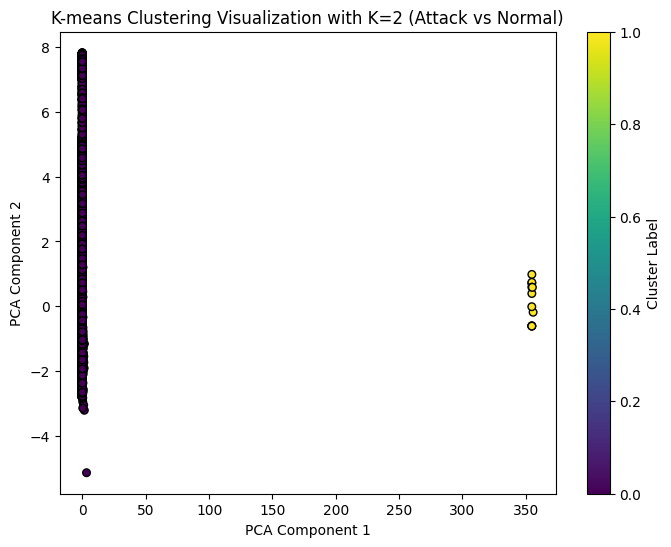

In [ ]:
Y = test_data.drop(columns=['attack', 'attack_binary'])

#  K-Means clustering with 2 clusters for test data( smaller segment)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labelsy = kmeans.fit_predict(Y)

# PCA for visualization
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y)

plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=kmeans_labelsy, cmap='viridis', marker='o', edgecolor='k', s=30)
plt.title('K-means Clustering Visualization with K=2 (Attack vs Normal)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## **DBSCAN**

The DBSCAN algorithm is applied to the numeric features of the training data, with specified parameters eps=0.5 and min_samples=5. These parameters control the density of the clusters, and the fit_predict method is used to assign cluster labels to each data point.

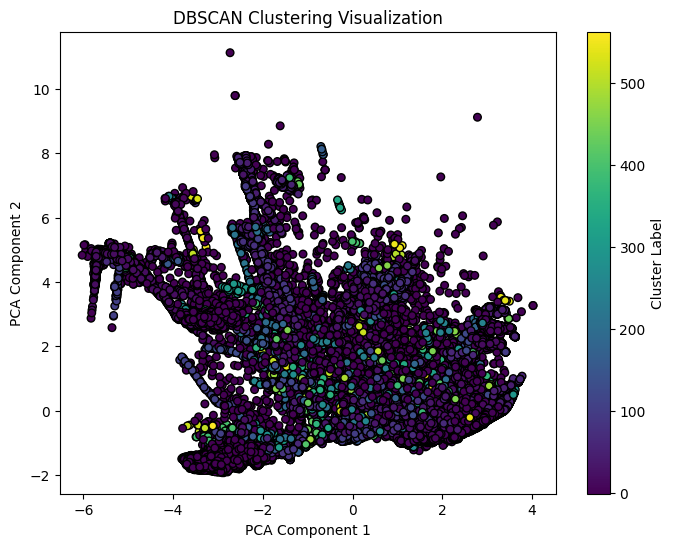

Silhouette Score for DBSCAN Clustering: -0.06226083073022489


In [ ]:
# Drop non-numeric columns to prevent ValueError
X_DBSCAN = train_data.drop(columns=['attack', 'attack_binary']).select_dtypes(include=[np.number])

#  DBSCAN clustering on train data
dbscan_train = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_train = dbscan_train.fit_predict(X_DBSCAN)

#  PCA
pca = PCA(n_components=2)
X_DB_pca_train = pca.fit_transform(X_DBSCAN)

plt.figure(figsize=(8, 6))
plt.scatter(X_DB_pca_train[:, 0], X_DB_pca_train[:, 1], c=dbscan_labels_train, cmap='viridis', marker='o', edgecolor='k', s=30)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Silhouette Score
if len(set(dbscan_labels_train)) > 1:
    silhouette_avg = silhouette_score(X_DBSCAN, dbscan_labels_train)
    print("Silhouette Score for DBSCAN Clustering:", silhouette_avg)

For each unique cluster, excluding the noise points (denoted as -1), the majority label of attack_binary is assigned to the cluster. The confusion matrix and accuracy score are computed to evaluate how well the DBSCAN clustering (with mapped labels) matches the true attack_binary labels.

In [ ]:
# Assigning the DBSCAN cluster labels to train_data
train_data['dbscan_cluster'] = dbscan_labels_train

# Assigning the majority attack_binary label to each cluster in train_data
cluster_labels_train = {}
for cluster in np.unique(dbscan_labels_train):
    if cluster != -1:
        majority_label = train_data[train_data['dbscan_cluster'] == cluster]['attack_binary'].mode()[0]
        cluster_labels_train[cluster] = majority_label

# If 'attack_binary' contains string labels, maping them to 0 and 1
train_data['attack_binary'] = train_data['attack_binary'].map({'normal': 0, 'attack': 1})

train_data['predicted_attack'] = train_data['predicted_attack'].map({0: 0, 1: 1, 'normal': 0, 'attack': 1})

# Fill  NaN values with 0 (normal), and then convert to integer type
train_data['predicted_attack'] = train_data['predicted_attack'].fillna(0).astype(int)

# Confusion Matrix
print("Train Data Confusion Matrix:")
print(confusion_matrix(train_data['attack_binary'], train_data['predicted_attack']))
print("Train Data Accuracy:", accuracy_score(train_data['attack_binary'], train_data['predicted_attack']))


Train Data Confusion Matrix:
[[65023  2320]
 [10523 48107]]
Train Data Accuracy: 0.8980495820532971


## **Hierarchial Clustering**

Agglomerative clustering with Ward's linkage and Euclidean distance is applied to detect two clusters, assumed to represent "normal" and "attack" groups. The resulting labels (agg_labels) represent cluster assignments for each data point.

Silhouette Score for Hierarchical Clustering: 0.9801326117044743


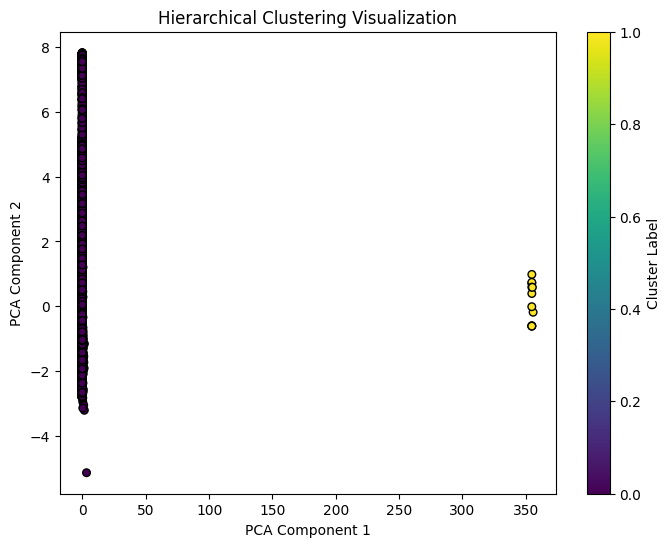

In [ ]:
#  feature data for clustering
X_hie = test_data.drop(columns=['attack', 'attack_binary', 'predicted_attack', 'cluster'], errors='ignore')

#  Hierarchical Clustering with Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(X_hie)

# Silhouette Score
silhouette_avg = silhouette_score(X_hie, agg_labels)
print("Silhouette Score for Hierarchical Clustering:", silhouette_avg)

# PCA
pca_hie = PCA(n_components=2)
X_pca_hie = pca_hie.fit_transform(X_hie)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_hie[:, 0], X_pca_hie[:, 1], c=agg_labels, cmap='viridis', marker='o', edgecolor='k', s=30)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

The following code below, evaluates the performance of hierarchical clustering on the test_data by assigning predicted attack labels based on the clustering results and comparing them to actual labels.

In [ ]:
# Adding cluster labels to train_data
test_data['cluster'] = agg_labels

# Assigning the majority attack_binary label to each cluster
cluster_labels = {}
for cluster in range(2):
    majority_label = test_data[test_data['cluster'] == cluster]['attack_binary'].mode()[0]
    cluster_labels[cluster] = majority_label

test_data['predicted_attack'] = test_data['cluster'].map(cluster_labels)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(test_data['attack_binary'], test_data['predicted_attack']))
print("Accuracy:", accuracy_score(test_data['attack_binary'], test_data['predicted_attack']))

Confusion Matrix:
[[12833     0]
 [ 9711     0]]
Accuracy: 0.5692423704755145


## **Gaussian Mixture Model**

GMM clustering on data, by initializing a GMM with two components to represent "normal" and "attack" clusters, fitting the model on X_gmm and generating cluster labels (gmm_labels) for each sample.  To visualize the clusters, the PCA is used  to reduce the features to two dimensions and then creates a scatter plot where each point, representing a sample, is colored according to its GMM-assigned cluster label

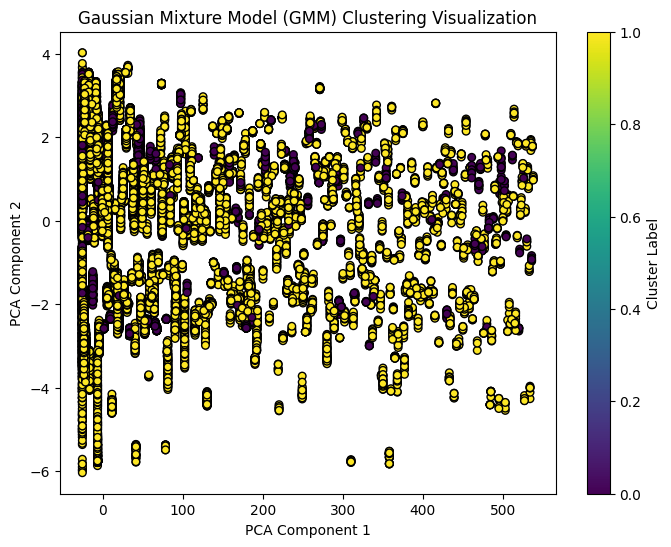

In [ ]:

# Preparing X_gmm by encoding or removing non-numeric columns
X_gmm = train_data.drop(columns=['attack', 'attack_binary'])

for column in X_gmm.columns:
    if X_gmm[column].dtype == 'object':
        le = LabelEncoder()
        X_gmm[column] = le.fit_transform(X_gmm[column])

#  Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_gmm)

train_data['gmm_cluster'] = gmm_labels

#  PCA
pca = PCA(n_components=2)
X_gmm_pca = pca.fit_transform(X_gmm)

#  Plot  GMM clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_gmm_pca[:, 0], X_gmm_pca[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolor='k', s=30)
plt.title('Gaussian Mixture Model (GMM) Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
# GMM cluster labels to the train_data
train_data['gmm_cluster'] = gmm_labels

# Map GMM cluster labels to the majority label
cluster_labels = {}
for cluster in range(2):
    majority_label = train_data[train_data['gmm_cluster'] == cluster]['attack_binary'].mode()[0]
    cluster_labels[cluster] = majority_label

# Map the predicted cluster labels to actual predictions
train_data['predicted_attack'] = train_data['gmm_cluster'].map(cluster_labels)

#  Silhouette Score
sil_score = silhouette_score(X_gmm, gmm_labels)
print("Silhouette Score:", sil_score)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(train_data['attack_binary'], train_data['predicted_attack']))
print("Accuracy:", accuracy_score(train_data['attack_binary'], train_data['predicted_attack']))


Silhouette Score: 0.47679341855502483
Confusion Matrix:
[[67343     0]
 [58630     0]]
Accuracy: 0.5345828074269883


## Inference

The project used multiple clustering methods—KMeans, DBSCAN, Agglomerative Clustering, and Gaussian Mixture Model—to differentiate between "normal" and "attack" instances in network data. Through techniques like the accuracy score and Silhouette Scores, we assessed the effectiveness of each model. We found that KMeans provided interpretable clusters with a high accuracy when clusters were mapped to attack types. Hierarchical Clustering displayed distinct group separations, and GMM allowed probabilistic assignment, offering nuanced insights. PCA visualization aided in interpreting cluster distribution across models. This comprehensive approach highlights the potential of unsupervised methods in preliminary anomaly detection.